In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib.colors import TwoSlopeNorm
from train_bot import ChessNet

# Load weights
model = ChessNet()
state = torch.load("best.pth", map_location="cpu")
model.load_state_dict(state)

<All keys matched successfully>

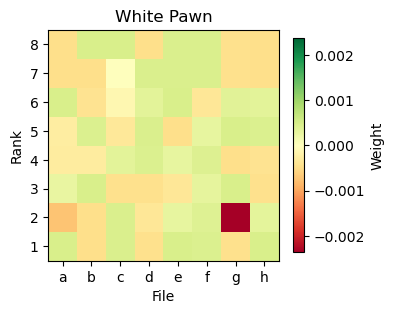

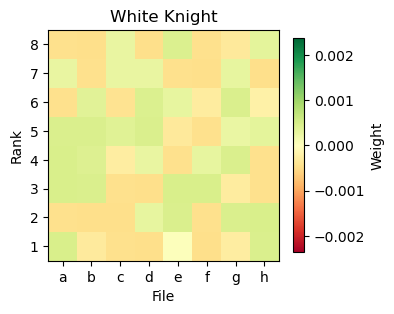

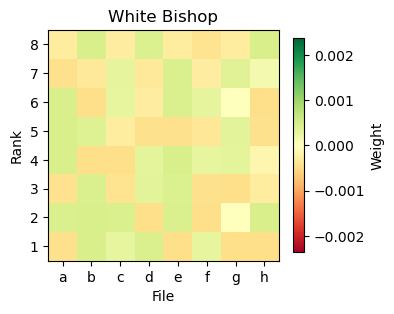

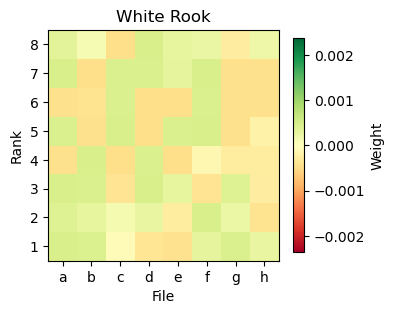

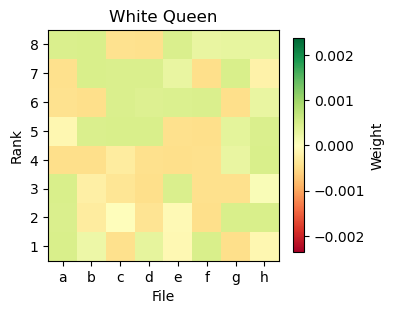

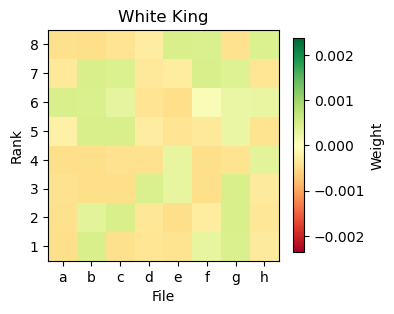

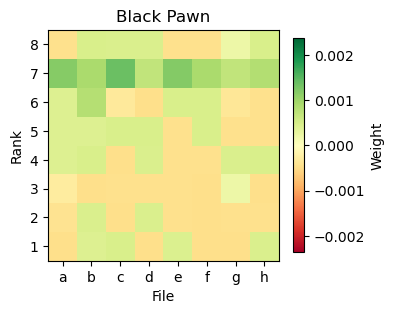

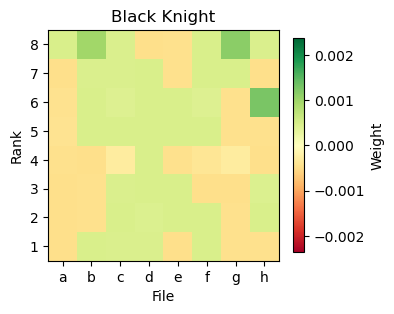

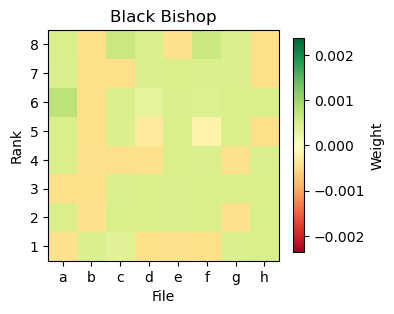

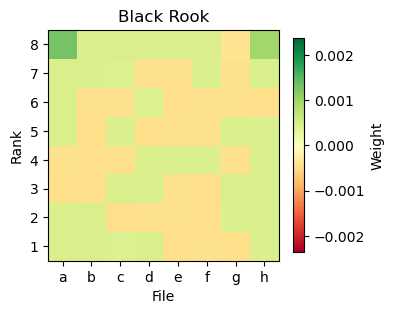

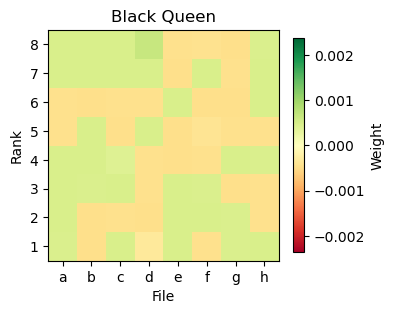

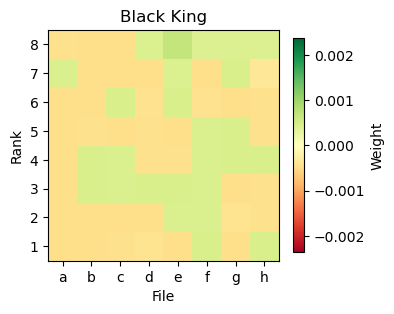

In [ ]:
boards = np.vstack(
    (
        model.fc1.weight.detach().cpu().numpy()[4][:384].reshape(6, 64),
        -model.fc1.weight.detach().cpu().numpy()[5][384:].reshape(6, 64),
    )
).reshape(12, 8, 8)

# Colormap norm around zero
max_abs = np.max(np.abs(boards))
norm = TwoSlopeNorm(vmin=-max_abs, vcenter=0, vmax=max_abs)

names = [
    "White Pawn",
    "White Knight",
    "White Bishop",
    "White Rook",
    "White Queen",
    "White King",
    "Black Pawn",
    "Black Knight",
    "Black Bishop",
    "Black Rook",
    "Black Queen",
    "Black King",
]

files = list("abcdefgh")
ranks = list("12345678")

for board, name in zip(boards, names):
    fig, ax = plt.subplots(figsize=(4, 4))
    im = ax.imshow(board, cmap="RdYlGn", norm=norm, origin="lower")
    ax.set_xticks(range(8))
    ax.set_xticklabels(files)
    ax.set_yticks(range(8))
    ax.set_yticklabels(ranks)
    ax.set_xlabel("File")
    ax.set_ylabel("Rank")
    ax.set_title(name)
    fig.colorbar(im, ax=ax, shrink=0.6, orientation="vertical", label="Weight")
    plt.tight_layout()
    plt.show()